# "Patrones con K means"

# Preparación de Datos

Algunas variables como SkinThickness no impactan de manera significativa al hacer el analisis en comparación a las otras variables analizadas. Frecuentemente es mejor entrenar el modelo con sólo las características significativas quitando las que no tienen ningún impacto.

In [13]:
import pandas as pd

In [14]:
diabetes = pd.read_csv('diabetes.csv')

In [15]:
diabetes_prep= diabetes.drop(['SkinThickness'], axis=1)    

In [16]:
diabetes_prep.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [18]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<!-- Se quitara la variable de outcome para realizar el analisis con las variables significativas

In [19]:
diabetes_prep= diabetes_prep.drop(['Outcome'], axis=1)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(diabetes_prep)

KMeans(n_clusters=2)

El valor de k es igual a 2 ya que solo hay dos posibilidades, que tenga diabetes o que no tenga diabetes

# Scikitlearn

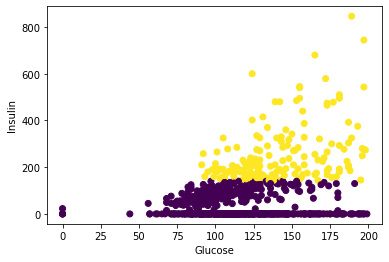

In [22]:
version1=diabetes_prep.loc[:,["Glucose","Insulin"]]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(version1)
labels = kmeans.predict(version1)

#gráqfica
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(diabetes_prep['Glucose'], diabetes_prep['Insulin'], c = labels)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

In [23]:
df = pd.DataFrame({'labels':labels, 'Outcome':diabetes['Outcome']})
crosstab = pd.crosstab(df['labels'],df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,422,182
1,78,86


se puede observar que el cluster con etiqueta de 0 se muestra que 422 personas no tienen diabetes y 182 si tienen diabetes
en el cluster 1 se observa que 78 personas no tienen diabetes y 86 si tienen diabetes.

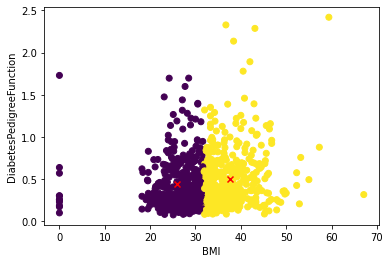

In [24]:
version2=diabetes_prep.loc[:,["BMI","DiabetesPedigreeFunction"]]
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(version2)
labels2 = kmeans2.predict(version2)

#gráqfica
plt.scatter(diabetes_prep['BMI'], diabetes_prep['DiabetesPedigreeFunction'], c = labels2)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

In [25]:
df = pd.DataFrame({'labels2':labels2, 'Outcome':diabetes['Outcome']})
crosstab = pd.crosstab(df['labels2'],df['Outcome'])
crosstab

Outcome,0,1
labels2,,
0,287,84
1,213,184


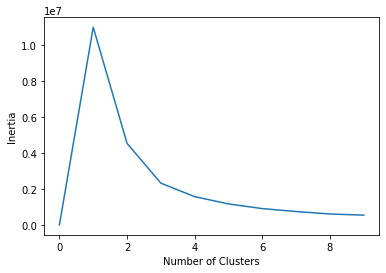

In [26]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(version1)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Número de clusters: 3
Cluster Centers: [[114.00808081  14.4       ]
 [158.44736842 441.28947368]
 [129.32765957 159.10212766]]


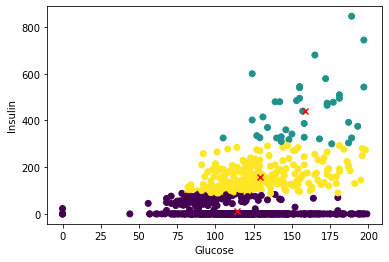

In [27]:
# Seleccionar dos variables y ver cómo se agrupan
version1=diabetes_prep.loc[:,["Glucose","Insulin"]]
# KMEANS 2
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=3)
kmeans_1.fit(version1)
labels_1 = kmeans_1.predict(version1)
list_clusters = np.unique(labels_1)
print("Número de clusters:",len(list_clusters))
print("Cluster Centers:",kmeans_1.cluster_centers_)


# visualization
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(diabetes_prep['Glucose'], diabetes_prep['Insulin'], c = labels_1)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Si son representativos ya que se observa que agrupan a los grupos de los datos indicando el mayor porcentaje de datos significativos y agrupandolos en uno solo por lo que es importante considerar el centro mas alto.

¿Cómo obtuviste el valor de k a usar?
al qerer tener 2 grupos para poder ver si se tiene o no se tiene diabetes pero en base a la gráfica se observa que se podrían necesitar 3.

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Si sería representativo ya que alteraria los datos al momento ser graficados casuando que la probabilidad de tener diabetes debidoa a la relacion de glucosa e insulina cambiaria el numero de outcome.

¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?
Los centros mas cercanos entre si son los de los grupos amarillos y morados, tambien se puede observar  menos dispersion dentro de esos grupos en comparación al subgrupo azul.

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Los centros causarian que la media cambiara por lo que el rando de variacion de la media y los quartiles se verían cambaiantes entre sí.
